## Data analysis for spotify music dataset

This part is for data analysis. See more detail for data visualization in "preprocessing" ipynb

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import graphviz
import pydotplus
import io
import imageio

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
path = "Data\cross_sell.csv"
data_set = pd.read_csv(path)

In [3]:
data_set.head()

,id,gender,age,dl,region_code,insured,vehicle_age,damage,premium,channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
# Unique values for all the columns
for col in data_set.columns[~(data_set.columns.isin(['dl', 'insured', 'age', 'id', 'region_code', 'premium', 'channel', 'vintage', 'response']))].tolist():
    print(" Unique Values --> " + col, ':', len(data_set[col].unique()), ': ', data_set[col].unique())

 Unique Values --> gender : 2 :  ['Male' 'Female']
 Unique Values --> vehicle_age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']
 Unique Values --> damage : 2 :  ['Yes' 'No']


In [5]:
gender = {'Male': 0, 'Female': 1}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}
# vehicle_insured = {0:1, 1:0}

data_set['gender'] = data_set['gender'].map(gender)
data_set['vehicle_age'] = data_set['vehicle_age'].map(vehicle_age)
data_set['damage'] = data_set['damage'].map(vehicle_damage)
# data_set['insured'] = data_set['insured'].map(vehicle_insured)

data_set['age'] = data_set['age'].apply(lambda x: np.int(x))
data_set['dl'] = data_set['dl'].apply(lambda x: np.int(x))
data_set['channel'] = data_set['channel'].apply(lambda x: np.int(x))
data_set['region_code'] = data_set['region_code'].apply(lambda x: np.int(x))
data_set['premium'] = data_set['premium'].apply(lambda x: np.int(x))
data_set['vintage'] = data_set['vintage'].apply(lambda x: np.int(x))
data_set['insured'] = data_set['insured'].apply(lambda x: np.int(x))

data_set

,id,gender,age,dl,region_code,insured,vehicle_age,damage,premium,channel,vintage,response
0,1,0,44,1,28,0,2,1,40454,26,217,1
1,2,0,76,1,3,0,1,0,33536,26,183,0
2,3,0,47,1,28,0,2,1,38294,26,27,1
3,4,0,21,1,11,1,0,0,28619,152,203,0
4,5,1,29,1,41,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,23,1,8,1,0,0,49438,152,277,0
99996,99997,0,54,1,49,0,1,0,23413,26,56,0
99997,99998,1,26,1,8,1,0,0,22694,152,41,0
99998,99999,0,25,1,8,1,0,0,49994,152,289,0


In [6]:
data_set.dtypes

id             int64
gender         int64
age            int64
dl             int64
region_code    int64
insured        int64
vehicle_age    int64
damage         int64
premium        int64
channel        int64
vintage        int64
response       int64
dtype: object

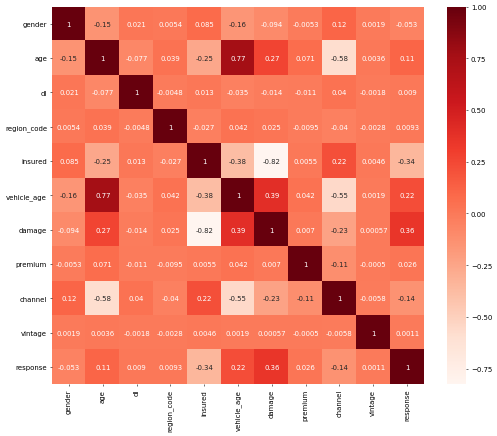

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(12,10), dpi = 50)
cor = data_set.drop(['id'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
features = ['gender', 'age', 'dl', 'region_code', 'insured', 'vehicle_age', 'damage', 'premium', 'channel', 'vintage']
X = data_set[features]
y = data_set['response'].values
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Decision training and prediction

* the stopping condition: the max depth
* the stopping condition: the min sample split

In [ ]:
# Analysis of Stopping criteria
# First analysis of max_depth

design_depth = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
num_model = len(design_depth)
score_train = []
score_test = []

for x in design_depth:
    tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 100, max_depth = x, splitter='random')
    tree_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, tree_clf.predict(X_train))
    score_te = accuracy_score(y_test, tree_clf.predict(X_test))
    print(score_tr, score_te)
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("max depth", fontsize=13)
ax.set_ylabel("accuracy", fontsize=13)
ax.set_title("Accuracy vs max depth for training and testing sets", fontsize=15)
ax.plot(design_depth, score_train, marker='o', label="train")
ax.plot(design_depth, score_test, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
# Analysis of Stopping criteria
# First analysis of min_sample_split

split = [500, 400, 300, 200, 100, 50, 20, 10, 5, 2]
num_model = len(split)
score_train = []
score_test = []

for x in split:
    print(x)
    tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = x, max_depth = 6)
    tree_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, tree_clf.predict(X_train))
    score_te = accuracy_score(y_test, tree_clf.predict(X_test))
    print(score_tr, score_te)
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("min sample split", fontsize=13)
ax.set_ylabel("accuracy", fontsize=13)
ax.set_title("Accuracy vs min sample split for training and testing sets", fontsize=15)
ax.plot(split, score_train, marker='o', label="train")
ax.plot(split, score_test, marker='o', label="test")
ax.legend()
plt.show()

### Analys the effects of ccp_alfa on the pruning of the decision tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha", fontsize=13)
ax.set_ylabel("total impurity of leaves", fontsize=13)
ax.set_title("Total Impurity vs effective alpha for training set", fontsize = 15)

In [ ]:
print(len(ccp_alphas))
print(ccp_alphas)
temp = 0.0
ccp_alphas = []
while temp < 0.001:
    ccp_alphas.append(temp)
    temp += 0.0001
print(len(ccp_alphas))
print(ccp_alphas)

In [ ]:
clfs = []
item = 0
for ccp_alpha in ccp_alphas:
    item += 1
    clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha", fontsize=14)
ax[0].set_ylabel("number of nodes", fontsize=14)
ax[0].set_title("Number of nodes vs alpha", fontsize=16)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha", fontsize=14)
ax[1].set_ylabel("depth of tree", fontsize=14)
ax[1].set_title("Depth vs alpha", fontsize=16)
fig.tight_layout()

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("alpha", fontsize=14)
ax.set_ylabel("accuracy", fontsize=14)
ax.set_title("Accuracy vs alpha for training and testing sets", fontsize=16)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, ccp_alpha=0.010)
tree_clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, tree_clf.predict(X_train))
score_test = accuracy_score(y_test, tree_clf.predict(X_test))
print(score_train, score_test)

0.876475 0.87905


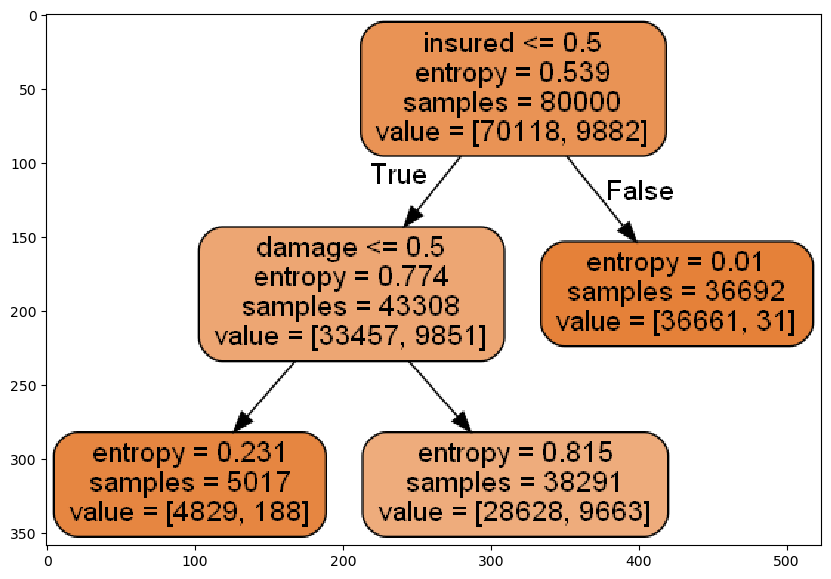

In [21]:
def show_tree(tree, features, path):
    f = io.StringIO()
    
    dot_data = export_graphviz(tree, out_file=f, feature_names=features, filled=True, rounded=True)
    
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (10,10)
    plt.rcParams['figure.dpi'] = 100
    plt.imshow(img)
show_tree(tree_clf, features, 'decision_tree.png')  

In [22]:
def show_tree(tree, features, path):
    f = io.StringIO()
    
    dot_data = export_graphviz(tree, out_file=f, feature_names=features, filled=True, rounded=True)
    
    pydotplus.graph_from_dot_data(f.getvalue()).write_svg(path)
show_tree(tree_clf, features, 'decision_tree.svg')

#### Decision Tree prediction vs validation

Text(0.5, 33.22222222222222, 'Features')

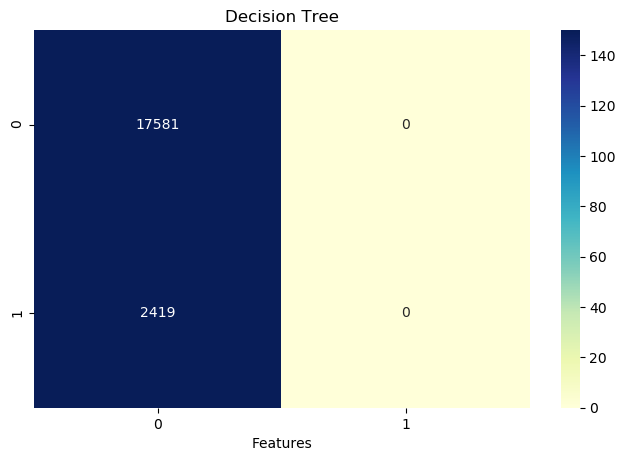

In [23]:
tree_y_pred = tree_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Boosting based on Decision Tree and HistGradientBoostingClassifier

In [ ]:
rate = []
for i in range(10):
    rate.append(0.01 + i*0.02)

score_train, score_test = [], []
for x in rate:
    Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("learning rate", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs learning rate for HistGradientBoosting", fontsize=15)
ax.plot(rate, score_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(rate, score_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
regular = []
for i in range(16):
    regular.append(0.01 + i*0.02)

sc_train, sc_test = [], []
for x in regular:
    Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=0.08, l2_regularization = x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    sc_train.append(score_tr)
    sc_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("regularization", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs regularization for HistGradientBoosting", fontsize=15)
ax.plot(regular, sc_train, marker='o', label="train")
ax.plot(regular, sc_test, marker='o', label="test")
ax.legend()
plt.show()

In [9]:
Boosting_clf = HistGradientBoostingClassifier(random_state=0, learning_rate=0.07, l2_regularization = 0.06)
Boosting_clf.fit(X_train, y_train)
score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
print(score_tr, score_te)

0.87775 0.8789


Text(0.5, 33.22222222222222, 'Features')

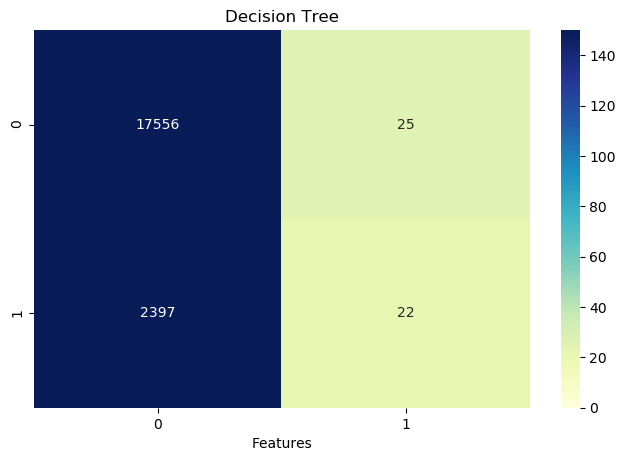

In [10]:
tree_y_pred = Boosting_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Boosting based on Decision Tree and GradientBoostingClassifier

In [ ]:
learn_rate = []
for i in range(4):
    learn_rate.append(0.01 + i*0.02)

score_tr_learn, score_te_learn = [], []
for x in learn_rate:
    Boosting_clf = GradientBoostingClassifier(random_state=0, learning_rate=x)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_tr_learn.append(score_tr)
    score_te_learn.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("learning rate", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs learning rate for GradientBoostingClassifier", fontsize=15)
ax.plot(learn_rate, score_tr_learn, marker='o', label="train")
ax.plot(learn_rate, score_te_learn, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
rate = []
for i in range(4):
    rate.append(0.0 + i*0.0002)

score_train, score_test = [], []
for x in rate:
    Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=x, learning_rate=0.08)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("ccp_alpha", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs pruning rate for GradientBoostingClassifier", fontsize=15)
ax.plot(rate, score_train, marker='o', label="train")
ax.plot(rate, score_test, marker='o', label="test")
ax.legend()
plt.show()

In [ ]:
Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=0.0012, learning_rate=0.08)
Boosting_clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, Boosting_clf.predict(X_train))
score_test = accuracy_score(y_test, Boosting_clf.predict(X_test))
print(score_train, score_test)

In [ ]:
tree_y_pred = Boosting_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

### Test of dataset size

In [ ]:
features = ['gender', 'age', 'dl', 'region_code', 'insured', 'vehicle_age', 'damage', 'premium', 'channel', 'vintage']
X = data_set[features]
y = data_set['response'].values

In [ ]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
size = len(test_sizes)
score_train, score_test = [], []
for x in test_sizes:
    print(x)
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = x)
    
    Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=0.0012, learning_rate=0.08)
    Boosting_clf.fit(X_train, y_train)
    score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
    score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
    score_train.append(score_tr)
    score_test.append(score_te)

In [ ]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 100)
ax.set_xlabel("dataset percentage of testing data", fontsize=13)
ax.set_ylabel("prediction score", fontsize=13)
ax.set_title("accuracy vs dataset size for training and testing sets", fontsize=15)
ax.plot(test_sizes, score_train, marker='o', label="train")
ax.plot(test_sizes, score_test, marker='o', label="test")
ax.legend()
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9)
Boosting_clf = GradientBoostingClassifier(random_state=0, ccp_alpha=0.0012, learning_rate=0.08)
Boosting_clf.fit(X_train, y_train)
score_tr = accuracy_score(y_train, Boosting_clf.predict(X_train))
score_te = accuracy_score(y_test, Boosting_clf.predict(X_test))
print(score_tr, score_te)

0.8777 0.8769111111111111


In [ ]:
tree_y_pred = Boosting_clf.predict(X_test)
TREECM = confusion_matrix(y_test, tree_y_pred)

f, axes = plt.subplots(figsize=(8, 5), dpi = 100)
sns.heatmap(TREECM, annot = True, fmt = 'd', vmin = 0 , vmax = 150, cmap = 'YlGnBu')
axes.set_title('Decision Tree')
axes.set_xlabel('Features')

In [11]:
print(22 / (22 + 2397))

0.009094667217858619
